In [102]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Change in mean ($\theta_{1} $ known)
Here, except for the change in time $ t_{0} $ all other parameters are assumed to be known.

In [114]:
n = 3
num_samples = 100
MU_0 = 0
MU_1 = 1
SIGMA = 1

(600,)


In [116]:
def generate_time_series(MU_0, MU_1, SIGMA, N, NUM_SAMPLES):
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(1, NUM_SAMPLES * N)), 
                     np.random.normal(MU_1,SIGMA,(1, NUM_SAMPLES * N))),axis=1 )
    return TS[0]

def get_alarm_time(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h, kappa):
    v = MU_1 - MU_0
    b = (MU_1 - MU_0)/SIGMA
    
    decision_function = np.sum((TS.reshape(2*NUM_SAMPLES, N) - MU_0 - (v/2)), axis=1)
    
    decisions = decision_function > h
    
    t0 = np.argmax(decisions == True)
    
    threshold = MU_0 + (kappa * SIGMA/np.sqrt(N))
    y_bar = (1/N)*np.sum(TS.reshape(2*NUM_SAMPLES, N), axis=1)
    alarm_time = np.argmax(y_bar >= threshold)
    
    return decision_function, t0, alarm_time


def grid_search(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h_values, kappa_values):
    t0_vals = []
    alarm_vals = []
    for k in kappa_values:
        for h in h_values:
            print ("iteration for k = {0} and h = {1}".format(k, h))
            d, time, alarm_time = get_alarm_time(MU_0, MU_1, SIGMA, TS, N, NUM_SAMPLES, h, k)
            t0_vals.append(time)
            alarm_vals.append(alarm_time)
            
    return t0_vals, alarm_vals

### Alarm is set when $ \frac{1}{N} \sum_{i=N(K-1)+1}^{NK} y_{i} \ge \mu_{0} + \kappa \frac{\sigma}{\sqrt{N}} $ 

In [129]:
TS = generate_time_series(0, 1, 1, n, num_samples)
print(TS.shape)

h_values = np.arange(1.5, 5.5, 0.25)
kappa_values = np.arange(0.5, 4, 0.25)
t0_vals, alarm_vals = grid_search(MU_0, MU_1, SIGMA, TS, n, num_samples, h_values, kappa_values)

iteration for k = 0.5 and h = 1.5
iteration for k = 0.5 and h = 1.75
iteration for k = 0.5 and h = 2.0
iteration for k = 0.5 and h = 2.25
iteration for k = 0.5 and h = 2.5
iteration for k = 0.5 and h = 2.75
iteration for k = 0.5 and h = 3.0
iteration for k = 0.5 and h = 3.25
iteration for k = 0.5 and h = 3.5
iteration for k = 0.5 and h = 3.75
iteration for k = 0.5 and h = 4.0
iteration for k = 0.5 and h = 4.25
iteration for k = 0.5 and h = 4.5
iteration for k = 0.5 and h = 4.75
iteration for k = 0.5 and h = 5.0
iteration for k = 0.5 and h = 5.25
iteration for k = 0.75 and h = 1.5
iteration for k = 0.75 and h = 1.75
iteration for k = 0.75 and h = 2.0
iteration for k = 0.75 and h = 2.25
iteration for k = 0.75 and h = 2.5
iteration for k = 0.75 and h = 2.75
iteration for k = 0.75 and h = 3.0
iteration for k = 0.75 and h = 3.25
iteration for k = 0.75 and h = 3.5
iteration for k = 0.75 and h = 3.75
iteration for k = 0.75 and h = 4.0
iteration for k = 0.75 and h = 4.25
iteration for k = 0.75

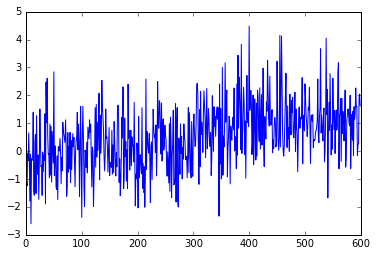

In [130]:
plt.plot(TS)

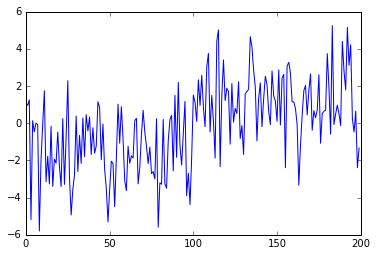

In [131]:
plt.plot(decision_fn)

In [132]:
print(len(t0_vals), len(alarm_vals))

224 224


[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 102, 102, 102]


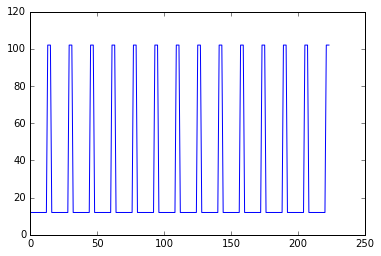

In [133]:
plt.plot(t0_vals)
print(t0_vals)

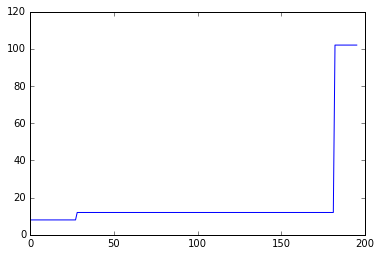

In [126]:
plt.plot(alarm_vals)

In [82]:
decision_fn[100:199].max()

5.5213511210644679